<a href="https://colab.research.google.com/github/ThainanST/half-wave-rectifier/blob/main/half_wave_rectifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install schemdraw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 2.9 MB/s eta 0:00:00


In [53]:
import numpy as np                 # vector operations
from scipy.optimize import fsolve  # nonlinear equation solver

from tabulate import tabulate      # print tabelas
import matplotlib.pyplot as plt    # plot graphs
import schemdraw                   # draw circuits
import schemdraw.elements as elm   # draw circuits

pi = np.pi;

def showTableAverage(strTable, Vo_rms, Io_med, Io_rms, Poutput):
  # Create a table to display calculated values.
  tab_text = [
    ["Description", "Symbol", "Unit", "Calculated Values"],
    ["Average voltage value", "Vo", "V", "{:.4f}".format(Vo_med)],
    ["RMS voltage value", "Vo,RMS", "V", "{:.4f}".format(Vo_rms)],
    ["Average current value", "Io", "A", "{:.4f}".format(Io_med)],
    ["RMS current value", "Io,RMS", "A", "{:.4f}".format(Io_rms)],
    ["Average Power", "Po", "W", "{:.4f}".format(Poutput)]
  ]
  # Print the table
  print(strTable + "- Measured and calculated values for the half-wave rectifier with resistive load")
  print(tabulate(tab_text))

def showTableSpectrum(strTable, H, VhRMS, IhRMS):
  # Create a table to display spectral analysis results.
  tab_text = [["Order", "Voltage (Vn)", "Current (In)"]]
  for k in range(len(H)):
    tab_text.append( [str(H[k]), "{:.4f}".format(VhRMS[k]), "{:.4f}".format(IhRMS[k])] )
  # Print the table
  print("")
  print(strTable + " - Spectral analysis of the half-wave rectifier with resistive load.")
  print(tabulate(tab_text))


#A) Half-wave rectifier - R load

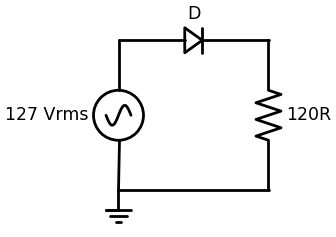

Tabela 2- Measured and calculated values for the half-wave rectifier with resistive load
---------------------  ------  ----  -----------------
Description            Symbol  Unit  Calculated Values
Average voltage value  Vo      V     57.1701
RMS voltage value      Vo,RMS  V     89.8026
Average current value  Io      A     0.4764
RMS current value      Io,RMS  A     0.7484
Average Power          Po      W     67.2042
---------------------  ------  ----  -----------------

Tabela 3 - Spectral analysis of the half-wave rectifier with resistive load.
-----  ------------  ------------
Order  Voltage (Vn)  Current (In)
0      57.1701       0.4764
1      63.5000       0.5292
2      26.9502       0.2246
4      5.3900        0.0449
6      2.3100        0.0193
8      1.2833        0.0107
10     0.8167        0.0068
-----  ------------  ------------


In [54]:
# Input
Vrms = 127
R = 120
Vm = Vrms*np.sqrt(2)

# Output
#  voltage
Vo_med = Vm/pi
Vo_rms = Vm/2

#  current
Io_med = Vo_med/R
Io_rms = Vo_rms/R

#  power
Poutput = R*Io_rms**2

# Harmonic analisis
H = np.array([0, 1, 2, 4, 6, 8, 10])
def calcVoltageSpectrum(H):
  VhRMS = []
  for h in H:
    if h == 0:
      VhRMS.append(Vm/pi)
    elif h == 1:
      Vpico = (Vm/2)
      VhRMS.append(Vpico/np.sqrt(2))
    else:
      Vpico = 2*Vm/( (h**2 - 1)*pi )
      VhRMS.append(Vpico/np.sqrt(2))
  return np.array(VhRMS)

VhRMS = calcVoltageSpectrum(H)
IhRMS = VhRMS/R

# Show values
with schemdraw.Drawing() as d:
    d += elm.Diode().label('D')
    d += elm.Resistor().down().label('120R', loc='bottom')
    d += elm.Line().left()
    d += elm.Ground()
    d += elm.SourceSin().up().label('127 Vrms')
showTableAverage("Tabela 2", Vo_rms, Io_med, Io_rms, Poutput)
showTableSpectrum("Tabela 3", H, VhRMS, IhRMS)

#B) Half-wave rectifier - RL load

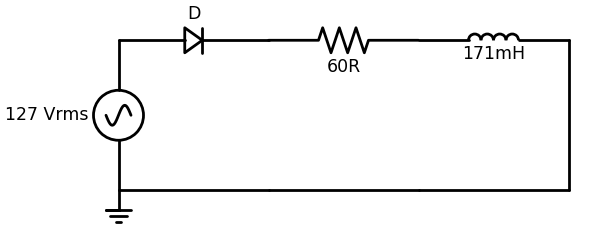

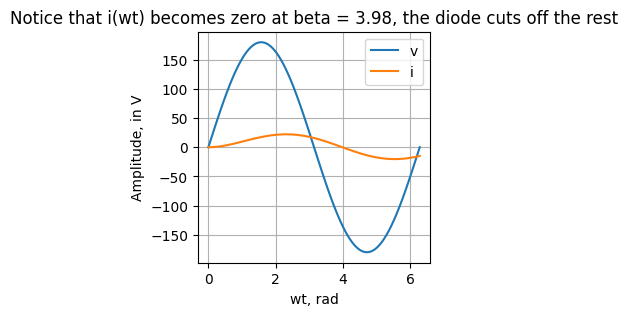

Table 2- Measured and calculated values for the half-wave rectifier with resistive load
---------------------  ------  ----  -----------------
Description            Symbol  Unit  Calculated Values
Average voltage value  Vo      V     47.6799
RMS voltage value      Vo,RMS  V     94.5667
Average current value  Io      A     0.7947
RMS current value      Io,RMS  A     1.1619
Average Power          Po      W     80.9987
---------------------  ------  ----  -----------------


In [55]:
# Input
Vrms = 127
R    = 60
L    = 171*10**(-3)

w   = 2*pi*60
Vm  = Vrms*np.sqrt(2)
tau = L/R                         # Time constant (s)
Z   = np.sqrt( R**2 + (w*L)**2 )  # Impedance (ohms, magnitude)
th  = np.arctan(w*L/R)            # Phase angle (radians)

# Draw circuit
with schemdraw.Drawing() as d:
    d += elm.Diode().label('D')
    d += elm.Resistor().label('60R', loc='bottom')
    d += elm.Inductor().label('171mH', loc='bottom')
    d += elm.Line().down()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Ground()
    d += elm.SourceSin().up().label('127 Vrms')

# Numeric solution
def nonlinear_equation(p):
    beta_var = p
    return (np.sin(beta_var - th) + np.sin(th)*np.exp(-beta_var/(w*tau)) )
beta = float( fsolve(nonlinear_equation, (np.pi)) )

# Plot
wt = np.linspace(0, 2*np.pi, 100)

v = Vm*np.sin(wt)
i = (Vm/Z)*(np.sin(wt-th) + np.sin(th)*np.exp( -wt/(w*tau) ) )

# Plots
plt.figure(figsize=(3,3))
plt.plot(wt, v, label='v')
plt.plot(wt, 10*i, label='i')

plt.grid()
plt.xlabel("wt, rad")
plt.ylabel("Amplitude, in V")
plt.title("Notice that i(wt) becomes zero at beta = {:.2f}, the diode cuts off the rest".format( beta ))
plt.legend()
plt.show()

# Calculation of average and RMS values
# https://www.w3schools.com/python/python_lambda.asp
wt = np.linspace(0, beta, 500)
v_func = lambda wt: Vm*np.sin(wt)
i_func = lambda wt: (Vm/Z)*(np.sin(wt-th) + np.sin(th)*np.exp( -wt/(w*tau) ) )

v = v_func(wt)
i = i_func(wt)

# Average values
Vo_med = 1/(2*np.pi)*np.trapz(v, x=wt)
Io_med = 1/(2*np.pi)*np.trapz(i, x=wt)

# RMS values
Vo_rms = np.sqrt( 1/(2*np.pi)*np.trapz(v**2, x=wt) )
Io_rms = np.sqrt( 1/(2*np.pi)*np.trapz(i**2, x=wt) )

# Power calculation
Poutput = R*Io_rms**2

# Show values
showTableAverage("Table 2", Vo_rms, Io_med, Io_rms, Poutput)


#C) Half-wave rectifier - RL load and freewheeling diode

## Do it yourself!